# Using NLP to extract quick and valuable insights from your customers’ reviews

- Quickly extraction of insights from textual data, leveraging consumers’ reviews as an example.
 
- We will present 4 different approaches:
    1. Unsupervised data exploration
    1. Sentiment analysis with features importance
    1. Analyzing correlation between ratings and predefined business themes
    1. Topic modeling

<br>

- Data description:
    - General satisfaction of costumer: 0 (bad) - 10 (excellent)

<br>

- Points:
    - Data mining or sentiment analysis is more exploratory: it will find out what matters the most, what could be the main reasons driving a review to be positive or negative.

--------------------------------------

We can start by simply looking at our most frequent words (single words, bi-grams, tri-grams…). It’s a simple analysis, but it gives you an immediate vision of what the main topics are for each score and category.

### Install an needed libraries

In [1]:
# conda install -c conda-forge wordcloud
# conda install -c anaconda nltk=3.5
# pip install nlpretext
# pip install googletrans==4.0.0-rc1

### Loading data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('new_survey_data.xlsx')

# Drop a column named 'Unnamed: 0' that is created when loading the excel workbook
print(df.columns)
df.drop(columns=[df.columns[0]], inplace=True)

Index(['Unnamed: 0', 'Cliente_ID', 'Empleado', 'Satisfacción General ',
       'Satisfacción con el Precio', 'Satisfacción con la puesta en escena',
       'Satisfacción de las infraestructuras',
       'Satisfacción con el tiempo de espera (cola)',
       'Satisfaccion con el Personal', 'Motivo de la Satisfacción',
       'Sexo_Cliente', 'Rangos Edad Cliente', 'Pago_Entrada',
       'Satisfacción_Category'],
      dtype='object')


### Translate text from spanish to english using Google Translator API ***(If Needed)***

In [3]:
from googletrans import Translator, constants

# init the Google API translator and check it's working
translator = Translator()
translation = translator.translate("Hola Mundo")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

Hola Mundo (es) --> Hello World (en)


In [4]:
# Check that there are no blank comments
print(f"There a {np.sum(pd.isna(df['Motivo de la Satisfacción']))} NaNs in comments column")

There a 0 NaNs in comments column


In [5]:
# Take spanish comments
comments_es = list(df['Motivo de la Satisfacción'])

# Translate spanish comments to english
comment_eng =  []
for i in range(len(comments_es)):
    comment_eng.append(translator.translate(comments_es[i],dest='en').text)

# Append a column with english translated comment to the dataframe
df["Comments"] = comment_eng

# Re-order columns. We want the two last columns to be the comments in spanish and english for visual inpection purposes
cols = df.columns.tolist()
cols = cols[:8] + cols[9:-1] + [cols[8], cols[-1]]
df = df[cols]
df.head()

,Cliente_ID,Empleado,Satisfacción General,Satisfacción con el Precio,Satisfacción con la puesta en escena,Satisfacción de las infraestructuras,Satisfacción con el tiempo de espera (cola),Satisfaccion con el Personal,Sexo_Cliente,Rangos Edad Cliente,Pago_Entrada,Satisfacción_Category,Motivo de la Satisfacción,Comments
0,1,Cristina Hernandez,3,6,10,2,7,7,H,55-65,123,Insatisfecho,"Pequeño, sin espacio, super incomodo. El espác...","Small, without space, super uncomfortable.The ..."
1,2,Ana Belen,10,10,10,8,9,7,M,35-45,29,Satisfecho,Es un tremendo espectaculo! Descomunal la actu...,It's a tremendous spectacle!Get the performanc...
2,3,Cristina Hernandez,3,5,9,0,7,7,H,55-65,97,Insatisfecho,Sin ascensores para personas con movilidad red...,Without elevators for people with reduced mobi...
3,4,Carolina Duran,10,9,10,10,8,8,H,35-45,141,Satisfecho,Quiero felicitar a todos los que han trabajado...,I want to congratulate all those who have work...
4,5,Ana Belen,10,8,10,10,8,7,M,35-45,86,Satisfecho,Es increible lo que pueden llegar a transmitir...,It is incredible what can be transmitted by th...


### Clean data

We will use [nlpretext](https://github.com/artefactory/NLPretext)


In [22]:
from nlpretext import Preprocessor
from nlpretext.basic.preprocess import (normalize_whitespace, remove_punct, remove_eol_characters,remove_stopwords, lower_text)
from nlpretext.social.preprocess import remove_mentions, remove_hashtag

def comment_processor(comment_list):
    preprocessor = Preprocessor()
    preprocessor.pipe(lower_text)
    preprocessor.pipe(remove_mentions)
    preprocessor.pipe(remove_hashtag)
    preprocessor.pipe(remove_eol_characters)
    preprocessor.pipe(remove_stopwords, args={'lang': 'es'})
    preprocessor.pipe(remove_punct)
    preprocessor.pipe(normalize_whitespace)

    processed_list = []
    for i in comment_list:
        processed_list.append(preprocessor.run(i))
    return processed_list

comments_list = list(df['Motivo de la Satisfacción'])
processed_comments = comment_processor(comments_list)

In [33]:
# Append a column with cleaned comments to the dataframe
df["Comments_cleaned"] = processed_comments

In [162]:
df.head()

,Cliente_ID,Empleado,Satisfacción General,Satisfacción con el Precio,Satisfacción con la puesta en escena,Satisfacción de las infraestructuras,Satisfacción con el tiempo de espera (cola),Satisfaccion con el Personal,Sexo_Cliente,Rangos Edad Cliente,Pago_Entrada,Satisfacción_Category,Motivo de la Satisfacción,Comments,Comments_cleaned
0,1,Cristina Hernandez,3,6,10,2,7,7,H,55-65,123,Insatisfecho,"Pequeño, sin espacio, super incomodo. El espác...","Small, without space, super uncomfortable.The ...",pequeño espacio super incomodo espáculo bonito
1,2,Ana Belen,10,10,10,8,9,7,M,35-45,29,Satisfecho,Es un tremendo espectaculo! Descomunal la actu...,It's a tremendous spectacle!Get the performanc...,tremendo espectaculo descomunal actuación pues...
2,3,Cristina Hernandez,3,5,9,0,7,7,H,55-65,97,Insatisfecho,Sin ascensores para personas con movilidad red...,Without elevators for people with reduced mobi...,ascensores personas movilidad reducida informa...
3,4,Carolina Duran,10,9,10,10,8,8,H,35-45,141,Satisfecho,Quiero felicitar a todos los que han trabajado...,I want to congratulate all those who have work...,quiero felicitar trabajado increible espectacu...
4,5,Ana Belen,10,8,10,10,8,7,M,35-45,86,Satisfecho,Es increible lo que pueden llegar a transmitir...,It is incredible what can be transmitted by th...,increible llegar transmitir forman suculento e...


### Tokenize comments by satisfaction
Approaches:
- We use all types of comments (Satisfecho, Insatisfecho, Neutro)
- Only Satisfecho
- Only Insatisfecho
- Only Neutro

Working with NLTK
- If not downloaded, you have to download NLTK library first.
- That is done uncommenting the line below and following this [guide](https://www.guru99.com/download-install-nltk.html#1)

In [ ]:
import nltk
# nltk.download()

In [55]:
from nltk.tokenize import word_tokenize

# Group comments by category
satis_comments = list(df[df['Satisfacción_Category']=='Satisfecho']['Comments_cleaned'])
insati_comments = list(df[df['Satisfacción_Category']=='Insatisfecho']['Comments_cleaned'])
neutro_comment = list(df[df['Satisfacción_Category']=='Neutro']['Comments_cleaned'])

# all comments
tokens_all = []
for i in processed_comments:
    tokens_all += word_tokenize(i)

# Satisfecho comments
tokens_satis = []
for i in satis_comments:
    tokens_satis += word_tokenize(i)

# Insatisfecho comments
tokens_insati = []
for i in insati_comments:
    tokens_insati += word_tokenize(i)

# Neutro comments
tokens_neutro = []
for i in neutro_comment:
    tokens_neutro += word_tokenize(i)

### Functions

In [154]:
from collections import Counter
import matplotlib.pyplot as plt
import wordcloud

plt.rcParams["figure.figsize"] = [16, 9]


def create_ngrams(token_list, nb_elements):
    """
    Create n-grams for list of tokens
    Parameters
    ----------
    token_list : list
        list of strings
    nb_elements :
        number of elements in the n-gram
    Returns
    -------
    Generator
        generator of all n-grams
    """
    ngrams = zip(*[token_list[index_token:] for index_token in range(nb_elements)])
    return (" ".join(ngram) for ngram in ngrams)


def frequent_words(list_words, ngrams_number=1, number_top_words=10):
    """
    Create n-grams for list of tokens

    input:
    ----------
    ngrams_number : int
    number_top_words : int
        output dataframe length

    output:
    -------
    DataFrame
        Dataframe with the entities and their frequencies.
    """
    frequent = []
    if ngrams_number == 1:
        pass
    elif ngrams_number >= 2:
        list_words = create_ngrams(list_words, ngrams_number)
    else:
        raise ValueError("number of n-grams should be >= 1")
    counter = Counter(list_words)
    frequent = counter.most_common(number_top_words)
    return frequent


def make_word_cloud(token_list, fig_tilte=None):
    """
    input: 
    ----------
        list of tokens ([str, str,...])
    
    output:
    ----------
        word cloud image
    """
    # Prepare tokens to create a list valid for 
    for i,w in enumerate(token_list):
        if i == 0:
            wcloud = w + ' '
        else:
            wcloud = wcloud + w + ' '
            
    word_cloud = wordcloud.WordCloud(stopwords=None).generate(wcloud)
    # plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f'{fig_tilte}')
    plt.axis("off")
    plt.show()

### Frequent works

In [165]:
# Display all n-grams in one dataframe
ngrams = 1
number_ngrams = 15

df_all_ngrams = pd.DataFrame(frequent_words(tokens_all, ngrams_number=ngrams, number_top_words=number_ngrams), columns=['All n-grams', 'frequency'])
df_insati_ngrams = pd.DataFrame(frequent_words(tokens_insati, ngrams_number=ngrams, number_top_words=number_ngrams), columns=['Insatisfecho', 'frequency'])
df_satis_ngrams = pd.DataFrame(frequent_words(tokens_satis, ngrams_number=ngrams, number_top_words=number_ngrams), columns=['Satisfecho', 'frequency'])
df_neutro_ngrams = pd.DataFrame(frequent_words(tokens_neutro, ngrams_number=ngrams, number_top_words=number_ngrams), columns=['Neutros', 'frequency'])
pd.concat([df_all_ngrams,df_insati_ngrams,df_satis_ngrams,df_neutro_ngrams], axis=1)

,All n-grams,frequency,Insatisfecho,frequency,Satisfecho,frequency,Neutros,frequency
0,espectaculo,22,espectaculo,10,espectaculo,9,obra,3
1,obra,18,mala,7,obra,8,teatro,3
2,teatro,11,obra,7,puesta,7,bonito,3
3,butacas,9,butacas,5,escena,7,espectaculo,3
4,puesta,8,espacio,4,increible,5,calor,2
5,escena,8,personas,4,actores,4,asiento,2
6,mala,8,organización,4,teatro,4,genial,2
7,increible,6,cobran,4,sonido,3,visto,1
8,incomodo,5,teatro,4,verlo,3,normalita,1
9,actores,5,incomodo,3,buena,3,estilo,1


### Cloud words

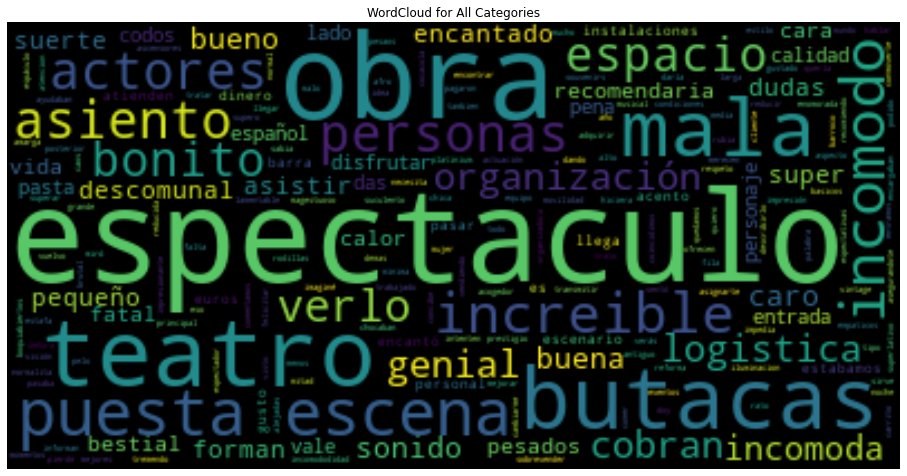

In [156]:
make_word_cloud(tokens_all, fig_tilte='WordCloud for All Categories')

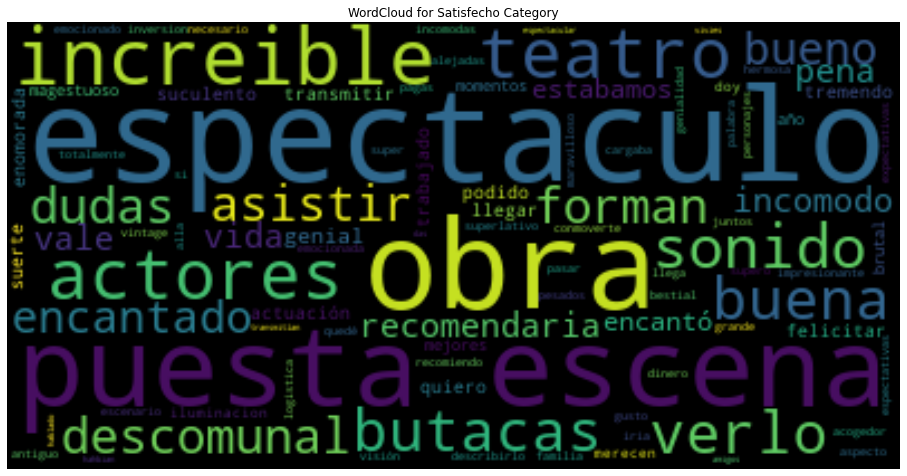

In [157]:
make_word_cloud(tokens_satis, fig_tilte='WordCloud for Satisfecho Category')

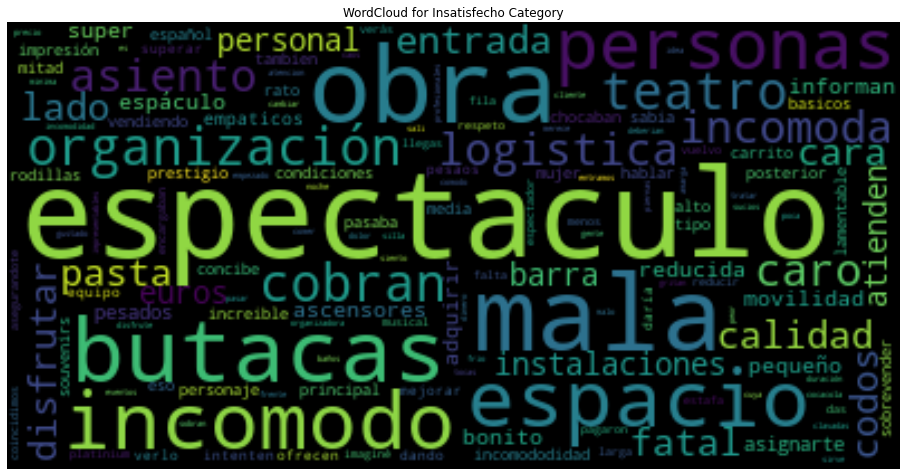

In [158]:
make_word_cloud(tokens_insati, fig_tilte='WordCloud for Insatisfecho Category')

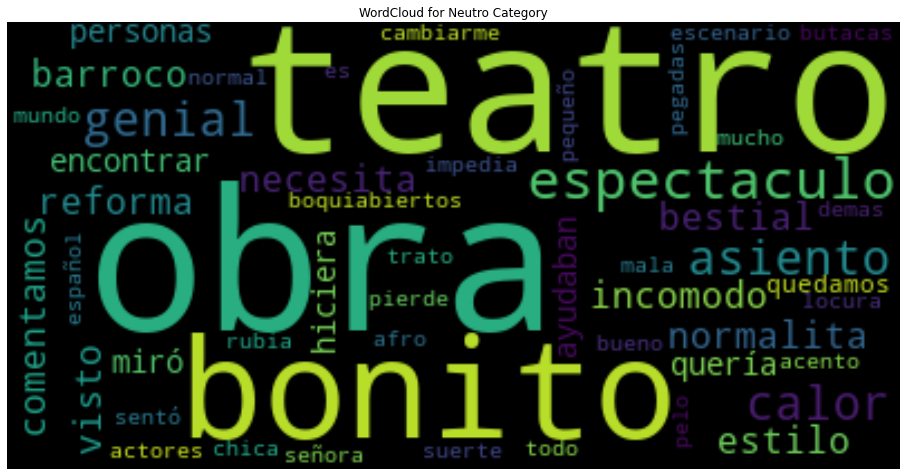

In [159]:
make_word_cloud(tokens_neutro, fig_tilte='WordCloud for Neutro Category')